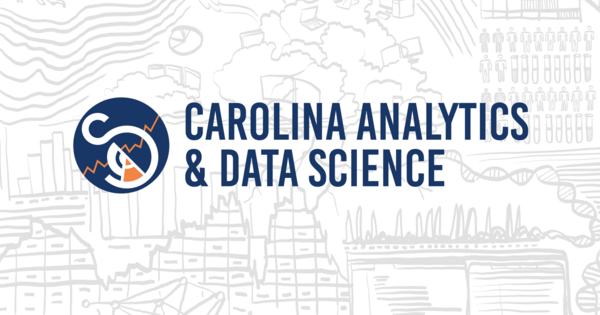

# CADS Presents: Introduction to APIs in collaboration with HackNC

## What is an API?

<div>
<img src="https://www.cleveroad.com/images/article-previews/40ca78a7a9db7adfb6bb861fc6b8910ae2ef4bb79f5508007d166f01df5c1038.png" width="500"/>
</div>

An **API**, or *application program interface*, is simply a way for two or more computers to communicate with each other.

APIs are an extremely powerful component of a software engineer's toolkit. With the use of APIs, engineers can connect their programs to other programs via the internet - allowing for the **transfer of data** and information between their apps and other external programs. We can use APIs within our *web applications* to connect to externals *web servers* - using online data to enhance our applications and provide extremely useful funtionality to users.

Using APIs is incredibly easy across many languages, including **JavaScript** and **Python**. Since both JavaScript and Python are both programming languages that can be used to build web applications, many developers already make it easy to connect to their APIs from these two languages.

In this demonstration, we will be using the **Python programming language**. Python is extremely diverse with many use cases - and, we can fully utilize these use cases when creating web applications. Python is an extremely powerful for *data science*, and oftentimes, we want to use data science to add functionality to our app projects. At CADS, we use Python for most of our data science projects. Python allows us to seamlessly integrate data science into our web applications.

Now, we are going to look at some uses of utilizing APIs in Python to get some interesting data from the web into our code!

## Using API Wrappers

Oftentimes, many people will want to connect to certain APIs from their programming language of choice. Because of this, developers might create open-source **API wrappers** that allow their fellow developers to connect to APIs from the language they are working in. Using API wrappers is often seamless, and not much setup is required! API wrappers serve as an intermediary between your application and an API. The wrappers handle common tasks such as constructing API requests and parsing responses (which we will dive into deeper later). **This is the easiest way to use an API**. 

For this demonstration, we will use the **[Python Weather API](https://pypi.org/project/python-weather/)** to get access to data about countries from around the world! Luckily, we do not have to manually connect to this API. The linked API is already an API wrapper for Python!

### Installing the `python_weather` API Wrapper

First, we must install this API wrapper so we can use it. In Jupyter Notebooks, we can use `pip`, Python's package manager, to install this functionality. Normally, we use the command line or terminal to install this. However, in Jupyter, we can add a `!` in front of our line of code to run it. The command `pip install python-weather`can be used to install the wrapper. So, we can run the following code below to install the package:

In [1]:
!pip install python-weather

  Obtaining dependency information for python-weather from https://files.pythonhosted.org/packages/65/e9/1f6eea43d7a7dfc64fcfcb3b426cf3367fd50eb59a9c0e9f2eea41a47d0c/python_weather-1.0.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.9/332.9 kB 2.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.8.3
    Uninstalling aiohttp-3.8.3:
      Successfully uninstalled aiohttp-3.8.3


### Setting up the Client

Now that the `python-weather` package has been installed, we can `import` it into our program:

In [2]:
import python_weather

We can now create a **client** object that allows us to make requests to access the data from the external API. This implementation varies depending on the API wrapper, so it is important to check the documentation to ensure the correct way to do this. In addition, some APIs require an *API key*, or a special password that allows you to access the API's data. The `python-weather` API does not require this, so we do not need to include it.

You can create a client using the code below:

In [3]:
client = python_weather.Client(unit=python_weather.IMPERIAL)

Oftentimes, you can also pass in some parameters when creating the client to specify some extra useful information. In this case, we also told the client that we want our weather data to be formated in imperial units (ex. fahrenheit).

### Let's Get Some Data!

Now, let's use our client to actually get some data! Let's look up the weather for a certain place. Let's get the weather for Chapel Hill! To do this, we need to pass the string `"Chapel Hill"` to into the client's `.get()` function. We can store the result as a variable called `weather`, as shown below:

In [4]:
weather = await client.get("Chapel Hill")

Let's see what weather look like using the `print()` function.

In [5]:
print(weather)

<Weather current=<CurrentForecast temperature=64 description='Partly cloudy' kind="Kind.PARTLY_CLOUDY"> location=(35.91, -79.06)>


We cannot make out much from the output, however we can see that our weather object stores `current`, which is a `CurrentForecast` object! This stores data about the current weather in Chapel Hill. Let's explore this more. First, we can see what the `weather.current` object holds, then we can access Chapel Hill's current temperature using the following:

In [7]:
print(weather.current)
print(weather.current.temperature)

<CurrentForecast temperature=69 description='Partly cloudy' kind="Kind.PARTLY_CLOUDY">
69


That is pretty cool! There is even some other data that is stored in our weather object. While not seen exactly in the output above, our weather object also has a `forecasts` property, which is a list of forecast objects! We can loop over this to get the temperature over a few days, as well as some cool data about astronomy facts:

In [8]:
# get the daily weather forecast
for forecast in weather.forecasts:
    print(forecast.date, ": ", forecast.temperature, "degrees.\tMoon phase: ", forecast.astronomy.moon_phase)

2023-10-22 :  63 degrees.	Moon phase:  First Quarter
2023-10-23 :  54 degrees.	Moon phase:  Waxing Gibbous
2023-10-24 :  55 degrees.	Moon phase:  Waxing Gibbous


### Conclusion

That was pretty easy! We were able to get data from the internet simply using an API wrapper. Sometimes though, we need to access data directly from an API, and someone has not made wrapper for it. So, we need to access this data manually.

## REST APIs in Python

Next, we are going to get some data on **Pokémon**! Pokémon is a really popular video game franchise across the world, and we can get data on each individual Pokémon.

There is a great API to access this data called the PokéAPI. In fact, there is already a Python wrapper for this API - but let's do it manually this time.

### How to REST APIs Work

We can REST APIs using something called HTTP requests - a simplified framework that allows us to interact with API endpoints. In fact, the entire internet runs on these. Below is a summary:

| HTTP Method | Description                            |
| ----------- | -------------------------------------- |
| GET         | Retrieve an existing resource.         |
| POST        | Create a new resource.                 |
| PUT         | Update an existing resource.           |
| PATCH       | Partially update an existing resource. |
| DELETE      | Delete a resource.                     |


Now, a lot of this might look decently complicated. However, for the purposes of this lesson, we will simply be using the concept of the `GET` method, since we want to retrieve external data! `POST` is also quite useful if you want to interact with the API and potentially add more data to it, but we can reserve that for another day.

### Connecting to the PokéAPI

We can actually use the web browser to connect to the PokéAPI. We can look at the [documentation](https://pokeapi.co/docs/v2#pokemon-species) to learn how to actually retrieve pokemon data using the proper API endpoint! An API endpoint is a specific location that accepts requests and sends back a response. You will notice that the following link accesses Pokémon data:

`GET https://pokeapi.co/api/v2/pokemon-species/{id or name}/`

We can actually do this simply by typing in this URL to our browser! Let's get the data for the *Charizard*, a pretty popular fire-type Pokémon, so we type the following link into our browser:

`https://pokeapi.co/api/v2/pokemon-species/charizard/`

**WOAHH!!** That looks scary. This is known as **JSON**, or *JavaScript Object Notation*. This actually contains all of our data for Charizard.

Now, let's do this in our code so we can actually work with this.

### Connecting to REST APIs in Python

To connect to REST APIs in Python, you can use the `requests` library. The `requests` library is extremely cool because it allows us to bring data from the web directly into our program. Using the same step as above, we need to install this package using `pip`:

In [6]:
!pip install requests

Let's import the `requests` package into our code. Now, using `requests`, let's run this `GET` command for the URL we used above! We can store the result in a variable called `reponse`, as shown below:

In [7]:
import requests

request_url = "https://pokeapi.co/api/v2/pokemon-species/charizard/"
response = requests.get(request_url)

Now, the same JSON data we retrieved from our browser is stored in the `response` variable! Let's look at it using `.json()`, as shown below:

In [8]:
response.json()

{'base_happiness': 50,
 'capture_rate': 45,
 'color': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/pokemon-color/8/'},
 'egg_groups': [{'name': 'monster',
   'url': 'https://pokeapi.co/api/v2/egg-group/1/'},
  {'name': 'dragon', 'url': 'https://pokeapi.co/api/v2/egg-group/14/'}],
 'evolution_chain': {'url': 'https://pokeapi.co/api/v2/evolution-chain/2/'},
 'evolves_from_species': {'name': 'charmeleon',
  'url': 'https://pokeapi.co/api/v2/pokemon-species/5/'},
 'flavor_text_entries': [{'flavor_text': 'Spits fire that\nis hot enough to\nmelt boulders.\x0cKnown to cause\nforest fires\nunintentionally.',
   'language': {'name': 'en', 'url': 'https://pokeapi.co/api/v2/language/9/'},
   'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}},
  {'flavor_text': 'Spits fire that\nis hot enough to\nmelt boulders.\x0cKnown to cause\nforest fires\nunintentionally.',
   'language': {'name': 'en', 'url': 'https://pokeapi.co/api/v2/language/9/'},
   'version': {'name': 'blue'

Well, it looks a bit cleaner now! But, this is still a lot of data. We can actually use this `response` variable like a Python dictionary (or, a hashmap if you use Java). For example, we can find which Pokémon Charizard evolves from using the following:

In [9]:
print( response.json()["evolves_from_species"]["name"])

charmeleon


We can see that Charizard evolves from Charmeleon!

We can also get a description for Charizard using the following:

In [10]:
print( response.json()["flavor_text_entries"][10]["flavor_text"] )

It spits fire that is hot enough to melt
boulders. It may cause forest fires by
blowing flames.


### Additional Practice


![title](hacknc_2023_logo.JPEG)

This year, HackNC's is haunted with a theme of "Tech or Treat". To get ready, try to find some APIs that you could potentially incorporate in your project. Here's a list of [public APIs](https://github.com/public-apis/public-apis) to get started!



### Conclusion

The two API examples shown above are just a glimpse into the possibilities of using APIs with your web apps! Using [Flask](https://pythonbasics.org/what-is-flask-python/) to create web apps, you can easily combine this code into your website to use API data in your websites.

#### Special Thanks and Attributions

The CADS Board and the HackNC Team!